# Talent Squad

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics, impute
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet, LassoCV, Lasso
from sklearn.naive_bayes import GaussianNB

In [17]:
df_train = pd.read_csv("train.csv")

df_train = df_train.drop("Unnamed: 0", axis=1)
academia_one_hot = pd.get_dummies(df_train["test preparation course"])
df_train[academia_one_hot.columns] = academia_one_hot
df_train = df_train.drop("test preparation course", axis=1)
df_train = df_train.drop("completed", axis=1)
df_train = df_train.rename(columns={"none": "academia", "lunch": "beca-comedor", "math score": "matemáticas", "reading score": "lectura", "writing score": "redacción", "gender": "género"})
genero_one_hot = pd.get_dummies(df_train["género"])
df_train[genero_one_hot.columns] = genero_one_hot
df_train = df_train.drop("género", axis=1)
df_train = df_train.drop("female", axis=1)
comedor_one_hot = pd.get_dummies(df_train["beca-comedor"])
df_train[comedor_one_hot.columns] = comedor_one_hot
df_train = df_train.drop("beca-comedor", axis=1)
df_train = df_train.drop("standard", axis=1)
df_train = df_train.rename(columns={"free/reduced": "beca-comedor", "male": "gender", "parental level of education": "label"}) # 1 if male, 0 if female.
df_train["matemáticas"] = df_train["matemáticas"] / 100
df_train["lectura"] = df_train["lectura"] / 100
df_train["redacción"] = df_train["redacción"] / 100

display(df_train.head(5))


,label,matemáticas,lectura,redacción,academia,gender,beca-comedor
0,1,0.62,0.76,0.67,1,0,0
1,4,0.79,0.57,0.58,1,1,0
2,2,0.77,0.86,0.84,1,0,0
3,0,0.45,0.46,0.49,1,0,1
4,3,0.82,0.83,0.85,0,1,0


In [18]:
df_test = pd.read_csv("test.csv")

df_test = df_test.drop("Unnamed: 0", axis=1)
academia_one_hot = pd.get_dummies(df_test["test preparation course"])
df_test[academia_one_hot.columns] = academia_one_hot
df_test = df_test.drop("test preparation course", axis=1)
df_test = df_test.drop("completed", axis=1)
df_test = df_test.rename(columns={"none": "academia", "lunch": "beca-comedor", "math score": "matemáticas", "reading score": "lectura", "writing score": "redacción", "gender": "género"})
genero_one_hot = pd.get_dummies(df_test["género"])
df_test[genero_one_hot.columns] = genero_one_hot
df_test = df_test.drop("género", axis=1)
df_test = df_test.drop("female", axis=1)
comedor_one_hot = pd.get_dummies(df_test["beca-comedor"])
df_test[comedor_one_hot.columns] = comedor_one_hot
df_test = df_test.drop("beca-comedor", axis=1)
df_test = df_test.drop("standard", axis=1)
df_test = df_test.rename(columns={"free/reduced": "beca-comedor", "male": "gender"}) # 1 if male, 0 if female.
df_test["matemáticas"] = df_test["matemáticas"] / 100
df_test["lectura"] = df_test["lectura"] / 100
df_test["redacción"] = df_test["redacción"] / 100

display(df_test.head(5))

,matemáticas,lectura,redacción,academia,gender,beca-comedor
0,0.54,0.43,0.45,1,1,0
1,0.72,0.77,0.77,1,0,0
2,0.87,0.97,1.00,1,0,0
3,0.55,0.55,0.55,1,1,0
4,0.56,0.54,0.43,1,1,0


C:\Users\danil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


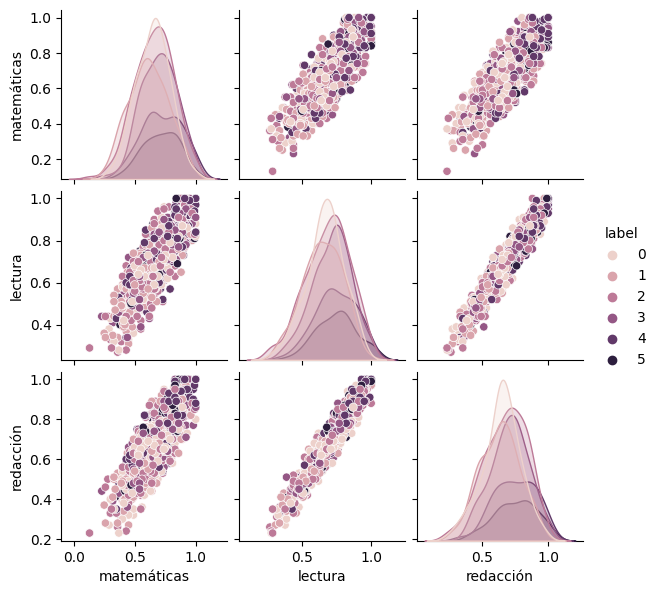

In [19]:
sb.pairplot(df_train.dropna(), hue='label',size=2,vars=["matemáticas","lectura","redacción"],kind='scatter')

In [20]:
X = df_train.drop("label", axis=1)
y = df_train.pop("label")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1234, stratify=y)

In [21]:
modelo = LassoCV(
    alphas = np.logspace(-10, 3, 200),
    cv = 10,
    max_iter=10000
)

modelo.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-10, 1.16232247e-10, 1.35099352e-10, 1.57029012e-10,
       1.82518349e-10, 2.12145178e-10, 2.46581108e-10, 2.86606762e-10,
       3.33129479e-10, 3.87203878e-10, 4.50055768e-10, 5.23109931e-10,
       6.08022426e-10, 7.06718127e-10, 8.21434358e-10, 9.54771611e-10,
       1.10975250e-09, 1.28989026e-09, 1.49926843e-09, 1.74263339e-09,
       2.02550194e-09, 2.35428641e-0...
       3.14403547e+01, 3.65438307e+01, 4.24757155e+01, 4.93704785e+01,
       5.73844165e+01, 6.66991966e+01, 7.75259749e+01, 9.01101825e+01,
       1.04737090e+02, 1.21738273e+02, 1.41499130e+02, 1.64467618e+02,
       1.91164408e+02, 2.22194686e+02, 2.58261876e+02, 3.00183581e+02,
       3.48910121e+02, 4.05546074e+02, 4.71375313e+02, 5.47890118e+02,
       6.36824994e+02, 7.40196000e+02, 8.60346442e+02, 1.00000000e+03]),
        cv=10, max_iter=10000)

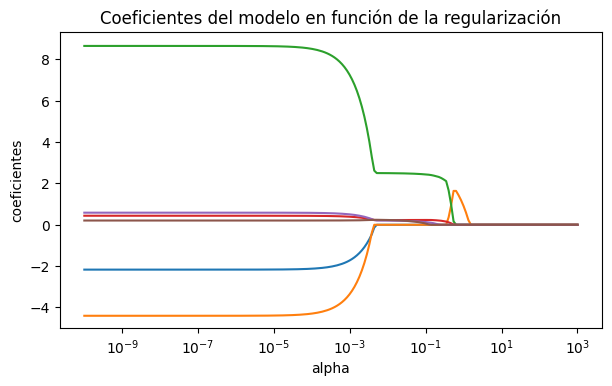

In [22]:
# Evolución de los coeficientes en función de alpha
alphas = modelo.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, max_iter=100000)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

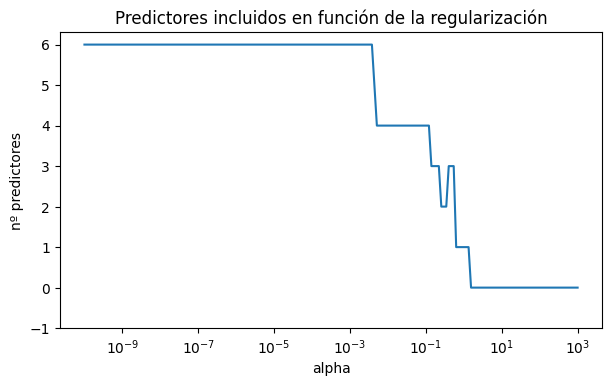

In [23]:
# Número de predictores incluidos (coeficiente !=0) en función de alpha
alphas = modelo.alphas_
n_predictores = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, max_iter=100000)
    modelo_temp.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-1,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº predictores')
ax.set_title('Predictores incluidos en función de la regularización');

In [24]:
# Evolución del error en función de alpha
mse_cv = modelo.mse_path_.mean(axis=1)
mse_sd = modelo.mse_path_.std(axis=1)

# mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

In [25]:
# Mejor valor alpha encontrado
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 1e-10


In [26]:
modelo = Lasso(alpha=optimo)
modelo.fit(X_train, y_train)

df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

df_coeficientes[df_coeficientes.coef != 0]

,predictor,coef
0,matemáticas,-2.331712
1,lectura,-4.239556
2,redacción,9.054983
3,academia,0.512623
4,gender,0.652063
5,beca-comedor,0.251890


Text(0.5, 1.0, 'Coeficientes del modelo')

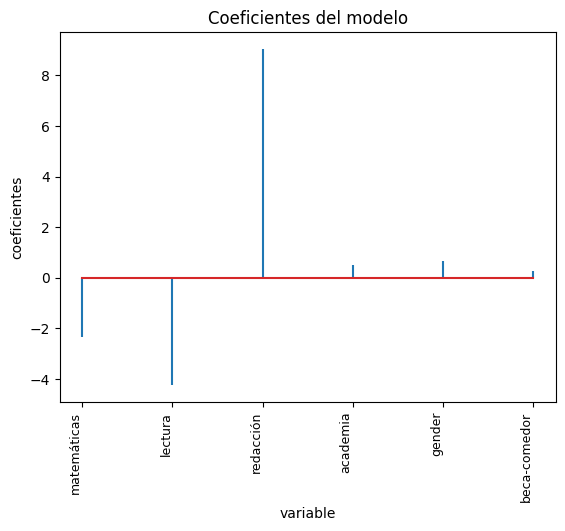

In [27]:
fig, ax = plt.subplots()
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=9)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo')

In [28]:
y_pred = modelo.predict(X_test)
y_pred = y_pred.astype(int)
y_pred = pd.DataFrame(y_pred, columns= [""])

In [29]:
rmse_lasso = metrics.mean_squared_error(
                y_true  = y_test,
                y_pred  = y_pred,
                squared = False
             )
print(f"El error (rmse) de test es: {rmse_lasso}")

El error (rmse) de test es: 1.4620191517213446


In [30]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.000     0.000     0.000        16
           1      0.333     0.667     0.444        15
           2      0.146     0.368     0.209        19
           3      0.000     0.000     0.000        15
           4      0.000     0.000     0.000         9
           5      0.000     0.000     0.000         6

    accuracy                          0.212        80
   macro avg      0.080     0.173     0.109        80
weighted avg      0.097     0.212     0.133        80



C:\Users\danil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334